In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [5]:
X_train.shape,y_train.shape,"***********",X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '***********', (10000, 28, 28), (10000,))

In [6]:
class_labels=["T-shirt/top", "Trouser","Pullover","Dress" ,"Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

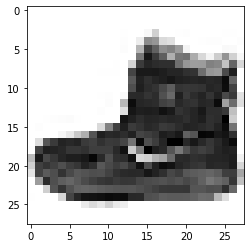

In [7]:
plt.imshow(X_train[0],cmap="Greys")

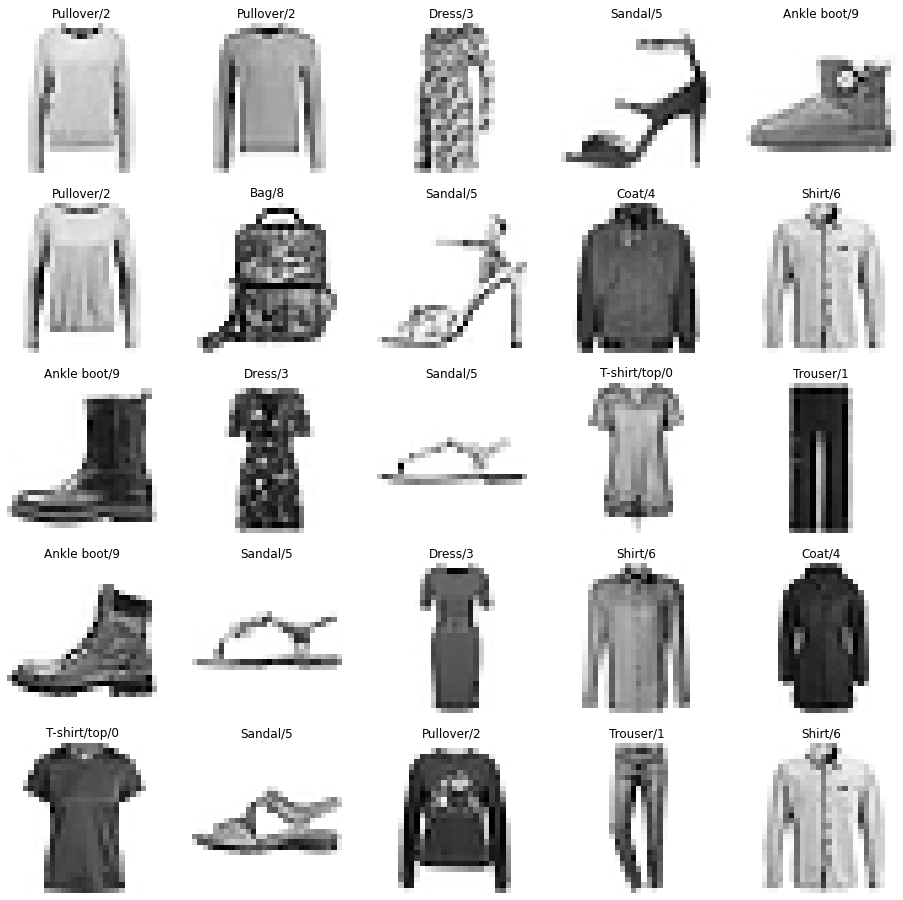

In [8]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

In [9]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [12]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# BUILDING CNN MODEL

In [13]:
model=keras.models.Sequential([
                              keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                              keras.layers.MaxPooling2D(pool_size=(2,2)),
                              keras.layers.Flatten(),
                              keras.layers.Dense(units=128,activation='relu'),
                              keras.layers.Dense(units=10,activation='softmax')
                              ])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 28s 141ms/step - loss: 0.9113 - accuracy: 0.7093 - val_loss: 0.4142 - val_accuracy: 0.8562
Epoch 2/10
94/94 [==============================] - 13s 137ms/step - loss: 0.3842 - accuracy: 0.8657 - val_loss: 0.3605 - val_accuracy: 0.8751
Epoch 3/10
94/94 [==============================] - 13s 137ms/step - loss: 0.3341 - accuracy: 0.8825 - val_loss: 0.3342 - val_accuracy: 0.8826
Epoch 4/10
94/94 [==============================] - 13s 136ms/step - loss: 0.2939 - accuracy: 0.8970 - val_loss: 0.3058 - val_accuracy: 0.8936
Epoch 5/10
94/94 [==============================] - 13s 139ms/step - loss: 0.2710 - accuracy: 0.9048 - val_loss: 0.3012 - val_accuracy: 0.8963
Epoch 6/10
94/94 [==============================] - 13s 139ms/step - loss: 0.2671 - accuracy: 0.9040 - val_loss: 0.3009 - val_accuracy: 0.8930
Epoch 7/10
94/94 [==============================] - 13s 135ms/step - loss: 0.2446 - accuracy: 0.9128 - val_loss: 0.2855 - val_accuracy: 0.9002

In [17]:
y_pred=model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.22, 0.03, 0.  ]], dtype=float32)

In [18]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2778 - accuracy: 0.9001


[0.27781012654304504, 0.9000999927520752]

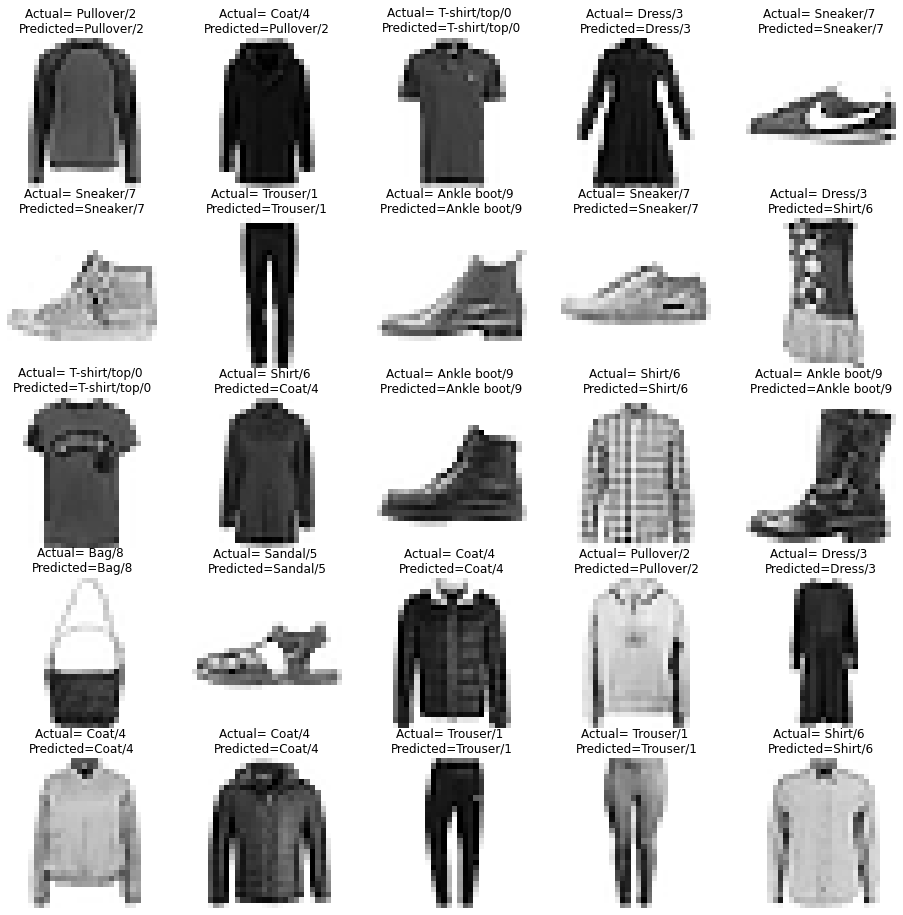

In [20]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap="Greys")
    plt.title('Actual= {}/{} \nPredicted={}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
    plt.axis('off')


# confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.79      0.89      0.84      1000
       Dress       0.87      0.94      0.90      1000
        Coat       0.88      0.79      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.76      0.70      0.73      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



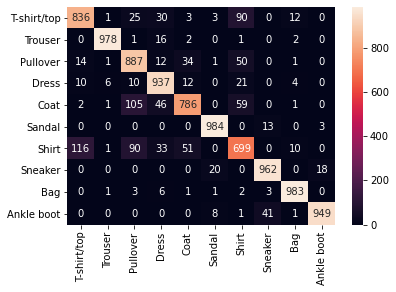

In [26]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

In [27]:
model.save('fashion_mnist_cnn_model.h5')